# Research on car sales ads

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Kami telah memberikan Anda beberapa komentar untuk menjadi panduan saat Anda menyelesaikan proyek ini. Tetapi, pastikan untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.

Sebelum Anda menganalisis data Anda, jelaskan tujuan dari proyek ini dan langkah-langkah yang akan Anda lakukan.

Perlu diingat bahwa mempelajari, mengubah, dan menganalisis data adalah proses yang dilakukan secara berulang. Kembali ke langkah sebelumnya guna memperbaikinya untuk memungkinkan langkah selanjutnya adalah hal yang lumrah untuk dilakukan.

Tujuan dari proyek ini adalah menentukan faktor-faktor apa saja yang mempengaruhi harga sebuah kendaraan.
Langkah-langkah yang dilakukan adalah:
- Pelajari informasi umumnya (mengeksplorasi data awal)
- Melakukan pra-pemrosesan data (Memeriksa dan mempelajari missing value, mengubah tipe data yang dibutuhkan)
- Hitung dan tambahkan beberapa hal ke tabel, seperti: Hari dalam minggu, bulan, dan tahun iklan ditayangkan, Usia kendaraan (dalam tahun) ketika iklan ditayangkan, Jarak tempuh rata-rata kendaraan per tahun
- Melakukan analisis data eksploratif
- Membuat kesimpulan secara menyeluruh terkait proyek

## Pra-pemrosesan

Muat *library* yang Anda yakini akan dibutuhkan untuk proyek ini. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Memuat Data

Muat data proyek ini dan baca informasi umumnya.

In [2]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

In [4]:
# tampilkan sampel data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Deskripsikan apa yang Anda lihat pada informasi umum dan sampel data yang ditampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?

Terdapat nilai yang hilang (missing value) pada beberapa kolom: model_year, cylinders, odometer, paint_color, is_4wd

In [5]:
# menampilkan missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Apakah terdapat kolom dengan tipe data yang tidak sesuai?

* Terdapat kolom dengan tipe data yang tidak sesuai pada kolom: model_year, is_4wd, date_posted
* Terdapat nilai yang aneh pada kolom: price

In [6]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [7]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Apakah terdapat nilai yang hilang di semua kolom atau hanya beberapa? Kolom apakah yang berisi paling banyak nilai yang hilang? Jelaskan secara singkat apa yang Anda amati dalam 1-2 kalimat.

Missing value hanya terdapat di beberapa kolom (5 kolom) seperti dibawah, dan kolom yang berisi paling banyak missing value adalah kolom is_4wd

In [8]:
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [9]:
df.duplicated().sum()

0

### Kesimpulan dan Langkah-Langkah Selanjutnya

Rumuskan kesimpulan Anda tentang data awal. Menurut Anda apa yang terlihat normal dan apa yang tidak?
Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini. Khususnya, Anda harus menyatakan dengan jelas bagian data mana yang harus ditangani agar lebih sesuai untuk analisis yang diperlukan.

* Terdapat nilai yang hilang (missing values) pada 5 kolom yaitu: model_year, cylinders, odometer, paint_color, is_4wd dan semua nilai yang hilang ini perlu diperbaiki sesuai dengan metodenya masing-masing.
* Terdapat nilai yang aneh pada kolom: price dimana harga mobil yang tidak masuk akal seharga 1 dan perlu analisa kembali
* Terdapat kolom dengan tipe data yang tidak sesuai pada kolom: model_year, is_4wd, date_posted dan perlu ditangani 

In [10]:
def fill_missing_value (dataframe, agg_column, value_column):
    
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Pelajari nilai yang hilang untuk setiap kolom secara lebih detail dan putuskan apa yang harus dilakukan dengan nilai tersebut berdasarkan hipotesis.

In [11]:
# memperbaiki nilai dan tipe data kolom 'is_4wd'

df['is_4wd'] = df['is_4wd'].fillna(0).astype('bool')

In [12]:
# memperbaiki nilai kolom 'model_year'

df_not_na = df[df['model_year'].notna()].reset_index(drop=True)
df_not_na.groupby('model')['model_year'].median()
df = fill_missing_value(df, 'model', 'model_year')

In [13]:
# memperbaiki nilai kolom 'cylinders'

df = fill_missing_value(df, 'model', 'cylinders')

In [14]:
# memperbaiki nilai kolom 'odometer'

df = fill_missing_value(df, 'condition', 'odometer')

In [15]:
# memperbaiki nilai kolom 'paint_color'

df['paint_color'] = df['paint_color'].fillna('custom')

In [16]:
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

## Memperbaiki Tipe Data

Karena data kurang lebih telah lengkap, maka perbaiki tipe datanya jika dibutuhkan.

In [17]:
df['model_year'] = df['model_year'].astype('int')

In [18]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

* Hari dalam minggu, bulan, dan tahun iklan ditayangkan
* Usia kendaraan (dalam tahun) ketika iklan ditayangkan
* Jarak tempuh rata-rata kendaraan per tahun
* Pada kolom condition, ganti nilai string dengan skala numerik:
    * new = 5
    * like new = 4
    * excellent = 3
    * good = 2
    * fair = 1
    * salvage = 0

Berikan faktor tambahan pada data agar lebih mudah dianalisis.

In [20]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['weekday_posted'] = df['date_posted'].dt.weekday
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year
df['day_posted'] = df['date_posted'].dt.day

In [21]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_cars'] = df['year_posted'] - df['model_year']

In [22]:
df['age_cars'] = df['age_cars'].replace(0, 1)

In [23]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_odometer'] = df['odometer'] / df['age_cars']

In [24]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def change_condition(value):
    if value == 'new':
        result = 5
    elif value == 'like new':
        result = 4
    elif value == 'excellent':
        result = 3
    elif value == 'good':
        result = 2
    elif value == 'fair':
        result = 1
    else:
        result = 0
    
    return result

In [25]:
df['condition'] = df['condition'].apply(change_condition)

## Memeriksa Data yang Sudah Bersih

Mengingat data sudah siap untuk dianalisis, mari kita lihat data Anda sekilas lagi. Sangat berguna untuk melihat apa yang sebenarnya akan Anda gunakan untuk analisis.

In [26]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  weekday_posted  51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  ye

In [27]:
# tampilkan sampel data 
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,day_posted,age_cars,avg_odometer
43554,9900,2011,ford edge,2,6.0,gas,87485.0,automatic,SUV,white,False,2018-05-24,57,3,5,2018,24,7,12497.857143
5849,13500,2007,chevrolet tahoe,3,4.0,gas,132000.0,automatic,SUV,red,False,2019-02-13,11,2,2,2019,13,12,11000.000000
48092,21000,2013,gmc sierra,3,8.0,gas,104230.0,automatic,truck,white,True,2019-03-31,18,6,3,2019,31,6,17371.666667
34499,4560,2007,honda civic,2,4.0,gas,177000.0,automatic,sedan,silver,False,2019-03-27,102,2,3,2019,27,12,14750.000000
42543,2995,2003,ford f-150,2,6.0,gas,129000.0,automatic,truck,red,True,2018-11-08,15,3,11,2018,8,15,8600.000000


## Mempelajari Parameter Inti 
Pilih pendekatan yang tepat untuk mempelajari parameter yang tercantum di bawah ini, berikan perhatian khusus bagaimana *outlier* memengaruhi bentuk dan kemudahan pembacaan histogram.

- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

Jika Anda merasa perlu untuk mengulangi pekerjaan yang sama beberapa kali, pikirkan tentang instrumen pengkodean apa yang mungkin berguna untuk hal tersebut guna menghindari penduplikasian kode Anda.

In [28]:
def visualize_column(column_name):
    plt.figure(figsize=(18,10))
    plt.subplot(2, 2, 1)
    plt.title(column_name + ' parameters hist')
    sns.histplot(df[column_name])
    plt.subplot(2, 2, 2)
    plt.title(column_name + ' parameters boxplot')
    sns.boxplot(df[column_name])
    plt.show()

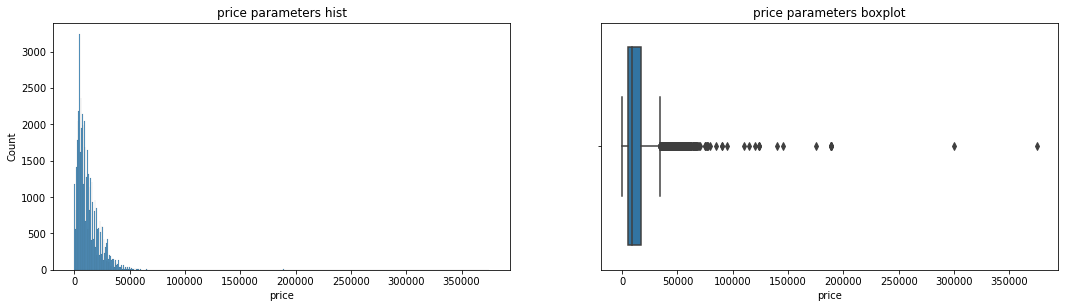

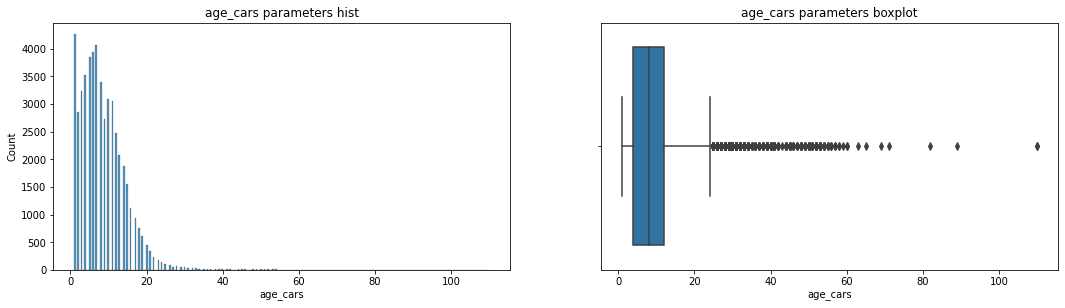

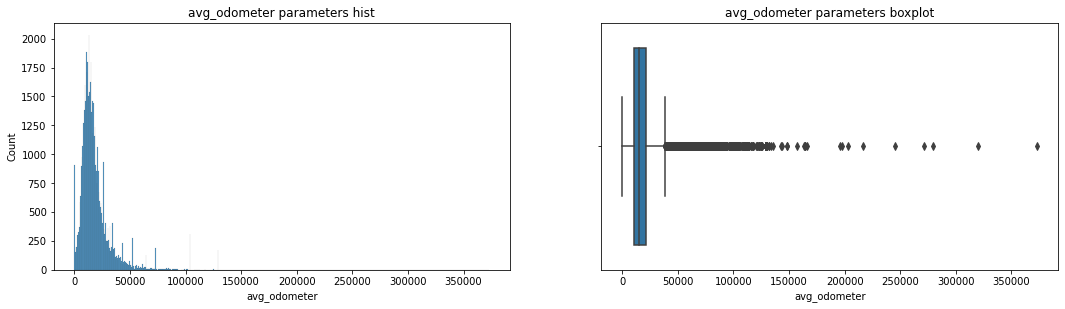

In [29]:
columns = ['price', 'age_cars', 'avg_odometer']
for column in columns:
    visualize_column(column)

Variabel dari kolom price, age_cars, avg_odometer banyak mengandung outlier

In [30]:
def visualize_column(column_name):
    plt.figure(figsize=(18,10))
    plt.subplot(2, 2, 1)
    plt.title(column_name + ' parameters countplot')
    sns.countplot(df[column_name])
    plt.show()

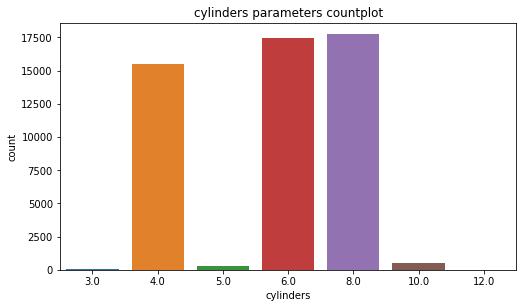

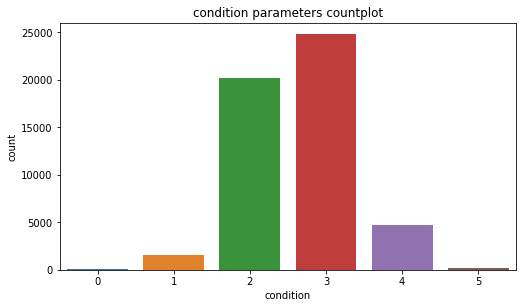

In [31]:
columns = ['cylinders', 'condition']
for column in columns:
    visualize_column(column)

Variabel dari kolom cylinders dan condition tidak ada outlier, 
karena terdapat beberapa silinder mobil sesuai dengan variabelnya

## Mempelajari dan Menangani Outlier

Dengan hasil di atas, tentukan kolom apa yang mungkin berisi *outlier*, dan buatlah sebuah DataFrame tanpa *outlier* tersebut. Petunjuk: *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.

In [32]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    print('Lower whisker:', lower_whisker)
    print('Upper whisker:', upper_whisker)
    filter = (df[column] > lower_whisker) & (df[column] < upper_whisker)
    return df.loc[filter]

In [33]:
df_new = remove_outlier(df,'price').reset_index(drop=True)

Lower whisker: -12758.5
Upper whisker: 34597.5


In [34]:
df_new = remove_outlier(df_new,'age_cars').reset_index(drop=True)

Lower whisker: -8.0
Upper whisker: 24.0


In [35]:
df_new = remove_outlier(df_new,'avg_odometer').reset_index(drop=True)

Lower whisker: -5882.352941176468
Upper whisker: 38196.078431372545


## Mempelajari Parameter Inti Tanpa Outlier

Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.

In [36]:
def visualize_column(column_name):
    plt.figure(figsize=(18,10))
    plt.subplot(2, 2, 1)
    plt.title(column_name + ' parameters hist')
    sns.histplot(df_new[column_name])
    plt.subplot(2, 2, 2)
    plt.title(column_name + ' parameters boxplot')
    sns.boxplot(df_new[column_name])
    plt.show()

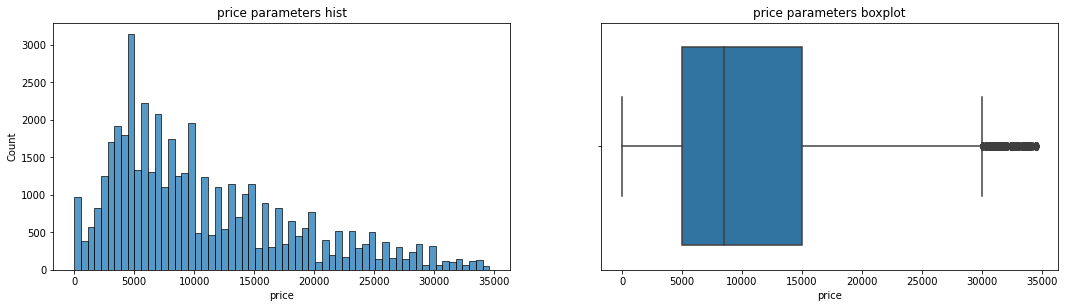

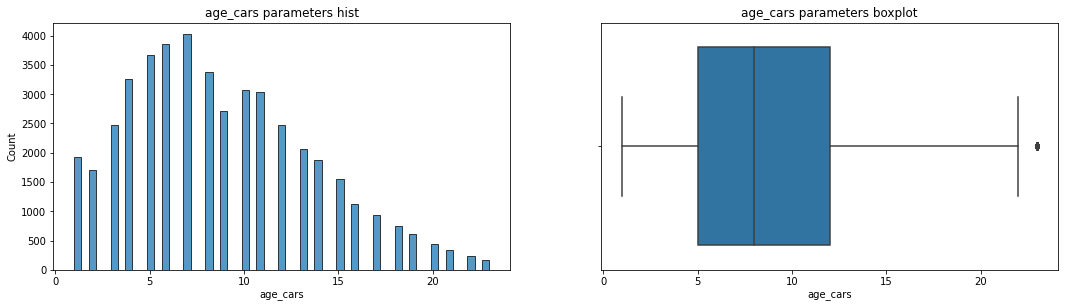

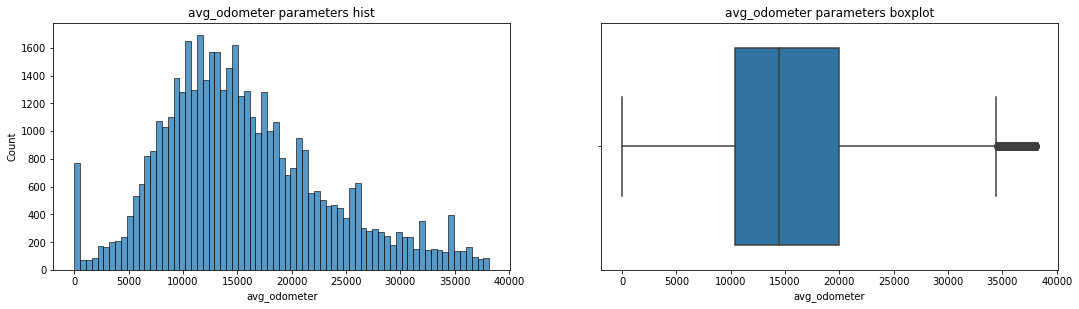

In [37]:
columns = ['price', 'age_cars', 'avg_odometer']
for column in columns:
    visualize_column(column)

<function matplotlib.pyplot.show(close=None, block=None)>

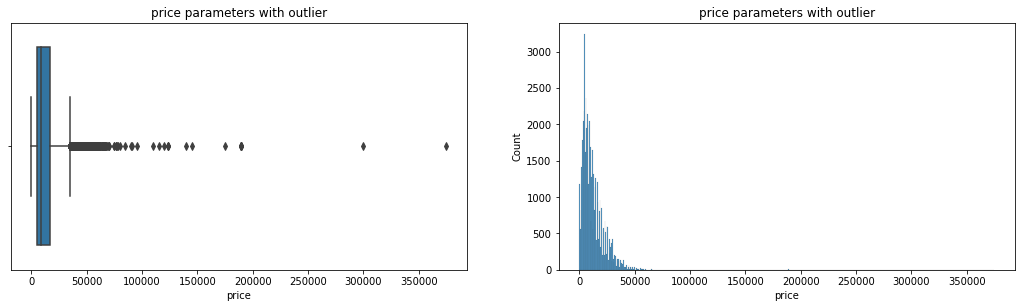

In [38]:
# parameter price (boxplot dan histogram) dengan outlier

plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
plt.title('price parameters with outlier')
sns.boxplot(df['price']);

plt.subplot(2, 2, 2)
plt.title('price parameters with outlier')
sns.histplot(df['price']);

plt.show

Variabel dari kolom price, age_cars, avg_odometer tanpa outlier, membuat grafiknya menjadi lebih mudah terbaca dibandingkan sebelumnya (ada outlier)

## Masa Berlaku Iklan 
Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.

In [39]:
df_new['days_listed'].describe()

count    45676.000000
mean        39.535073
std         28.219946
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

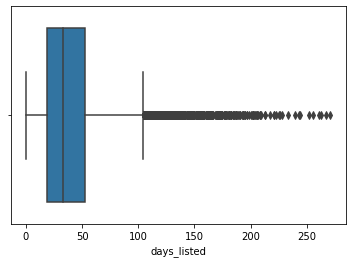

In [40]:
sns.boxplot(df_new['days_listed']);

rata-rata hitungan iklan yang ditayangkan berdasarkan kolom days_listed adalah 39 hari dan mediannya selama 33 hari. durasi lama penayangan iklan yang paling cepat adalah tidak sampai dalam hitungan hari (0 hari), dan durasi tayang iklan terlama selama 271 hari 

## Harga Rata-Rata Setiap Jenis Kendaraan

Lakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buatlah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.

In [41]:
agg_group_1 = df_new.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns= {
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by='count_type', ascending=False)

In [42]:
agg_group_1

,avg_price,count_type
type,,
SUV,10041.067233,11304
sedan,6654.340210,11246
truck,14467.004881,10449
pickup,14324.902692,5981
coupe,12885.447355,1909
wagon,8641.006122,1470
mini-van,7560.661696,1073
hatchback,6516.240838,955
van,8272.917127,543


Text(0, 0.5, 'average price per type')

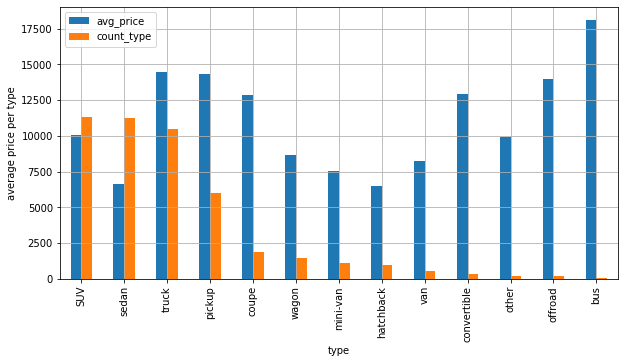

In [43]:
agg_group_1.plot(kind='bar', grid=True, figsize=(10,5))
plt.ylabel('average price per type')

setelah dianalisa terdapat 2 jenis mobil yang jumlah iklannya terbanyak yaitu jenis SUV dan Sedan, terlihat bahwa harga rata-rata dari kedua jenis mobil tersebut cukup bersaing dibanding jenis lain, selain karena jenis mobil tersebut populer dan banyak disukai, sehingga banyak yang mengiklankannya.

## Faktor Harga

Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

Manfaatkan matriks korelasi dan plot korelasi

In [44]:
# Jenis mobil SUV

df_new_suv = df_new[df_new['type']=='SUV'].reset_index(drop=True)

In [45]:
df_new_suv.corr()['price']

price             1.000000
model_year        0.572745
condition         0.271838
cylinders         0.017092
odometer         -0.493371
is_4wd            0.118483
days_listed      -0.023782
weekday_posted    0.010874
month_posted     -0.020954
year_posted       0.016913
day_posted        0.003226
age_cars         -0.572064
avg_odometer      0.255889
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

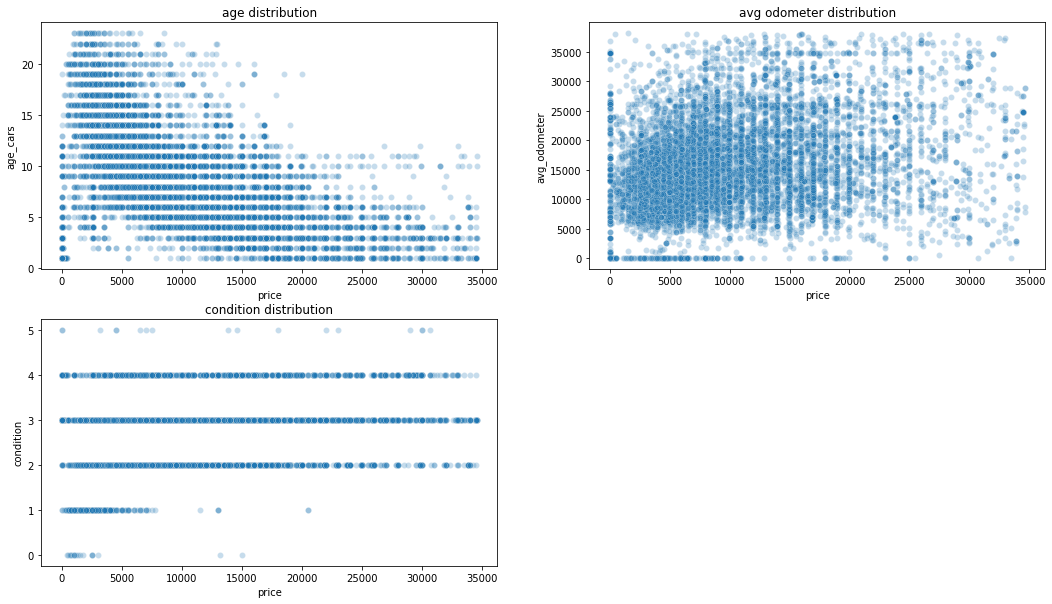

In [46]:
# harga sesuai usia kendaraan (SUV)
# harga sesuai usia jarak tempuh kendaraan (SUV)
# harga sesuai kondisi kendaraan (SUV)

plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
plt.title('age distribution')
sns.scatterplot(data=df_new_suv, alpha=0.25, x='price', y='age_cars');

plt.subplot(2, 2, 2)
plt.title('avg odometer distribution')
sns.scatterplot(data=df_new_suv, alpha=0.25, x='price', y='avg_odometer');

plt.subplot(2, 2, 3)
plt.title('condition distribution')
sns.scatterplot(data=df_new_suv, alpha=0.25, x='price', y='condition');

plt.show

In [47]:
df_new_suv['transmission'].value_counts()

automatic    10716
manual         456
other          132
Name: transmission, dtype: int64

Text(0.5, 1.0, 'SUV transmission category')

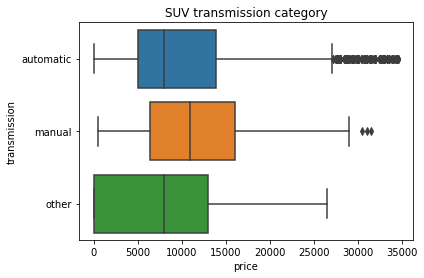

In [48]:
# harga sesuai tipe transmissi kendaraan (SUV)

sns.boxplot(data=df_new_suv, x='price', y='transmission');
plt.title('SUV transmission category')

In [49]:
df_new_suv['paint_color'].value_counts()

custom    2312
black     1963
white     1751
silver    1465
grey      1077
blue       968
red        846
green      416
brown      353
orange      73
yellow      42
purple      38
Name: paint_color, dtype: int64

In [50]:
list_include_colors = list(df_new_suv['paint_color'].value_counts()[:-2].index)

In [51]:
new_suv_colors = df_new_suv[df_new_suv['paint_color'].isin(list_include_colors)].reset_index(drop=True)

Text(0.5, 1.0, 'SUV color category')

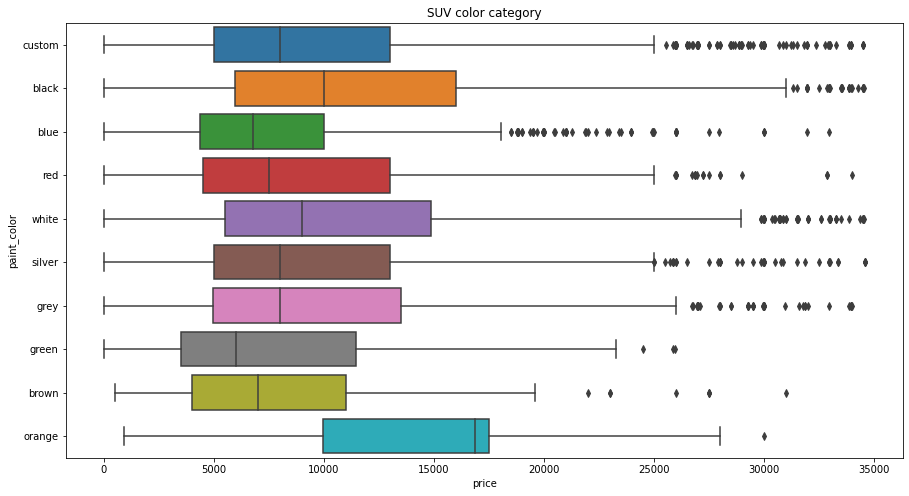

In [52]:
# harga sesuai warna kendaraan (SUV)

plt.figure(figsize=(15,8))
sns.boxplot(data=new_suv_colors, x='price', y='paint_color');
plt.title('SUV color category')

Kesimpulan sementara setelah dianalisa faktor yang paling mempengaruhi harga mobil populer jika dilihat dari beberapa parameter:

Jenis SUV, Parameter:
* Usia: semakin lama tahun mobil semakin rendah harga jual mobilnya.
* Jarak tempuh: semakin besar angkanya maka semakin berkurang juga harga jualnya, karena menyangkut kondisi mesin yang terus-terusan beroperasi.
* Kondisi: mobil dengan kondisi excellent dan like new memiliki harga yang lebih tinggi dibanding dengan kondisi yang new.
* Transmissi: untuk mobil jenis SUV dengan tansmissi manual masih menjadi favorit dengan harga yang paling tinggi.
* Warna: warna SUV yang memiliki harga tinggi dan populer adalah warna hitam, putih, dan abu-abu.

In [53]:
# Jenis mobil sedan

df_new_sedan = df_new[df_new['type']=='sedan'].reset_index(drop=True)

In [54]:
df_new_sedan.corr()['price']

price             1.000000
model_year        0.611826
condition         0.303182
cylinders        -0.025210
odometer         -0.540100
is_4wd            0.056425
days_listed       0.000063
weekday_posted   -0.003897
month_posted     -0.041272
year_posted       0.038158
day_posted        0.004518
age_cars         -0.605836
avg_odometer      0.190152
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

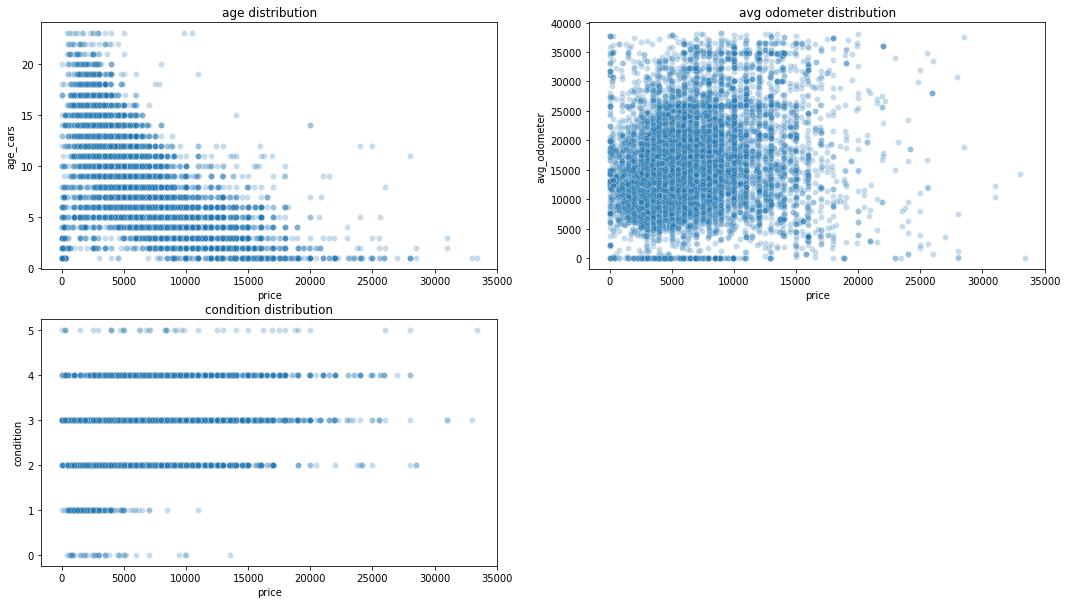

In [55]:
# harga sesuai usia kendaraan (sedan)
# harga sesuai usia jarak tempuh kendaraan (sedan)
# harga sesuai kondisi kendaraan (sedan)

plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
plt.title('age distribution')
sns.scatterplot(data=df_new_sedan, alpha=0.25, x='price', y='age_cars');

plt.subplot(2, 2, 2)
plt.title('avg odometer distribution')
sns.scatterplot(data=df_new_sedan, alpha=0.25, x='price', y='avg_odometer');

plt.subplot(2, 2, 3)
plt.title('condition distribution')
sns.scatterplot(data=df_new_sedan, alpha=0.25, x='price', y='condition');

plt.show

In [56]:
df_new_sedan['transmission'].value_counts()

automatic    10572
manual         564
other          110
Name: transmission, dtype: int64

Text(0.5, 1.0, 'sedan transmission category')

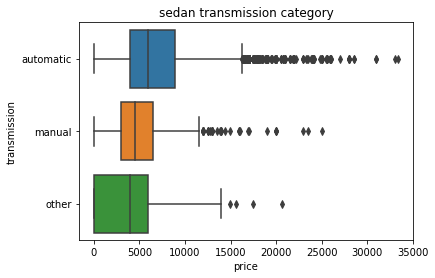

In [57]:
# harga sesuai tipe transmissi kendaraan (sedan)

sns.boxplot(data=df_new_sedan, x='price', y='transmission');
plt.title('sedan transmission category')

In [58]:
df_new_sedan['paint_color'].value_counts()

custom    2299
silver    1892
black     1617
grey      1490
white     1388
blue      1167
red        890
brown      247
green      199
purple      26
yellow      22
orange       9
Name: paint_color, dtype: int64

In [59]:
list_include_colors = list(df_new_sedan['paint_color'].value_counts()[:-3].index)

In [60]:
new_sedan_colors = df_new_sedan[df_new_sedan['paint_color'].isin(list_include_colors)].reset_index(drop=True)

Text(0.5, 1.0, 'sedan color category')

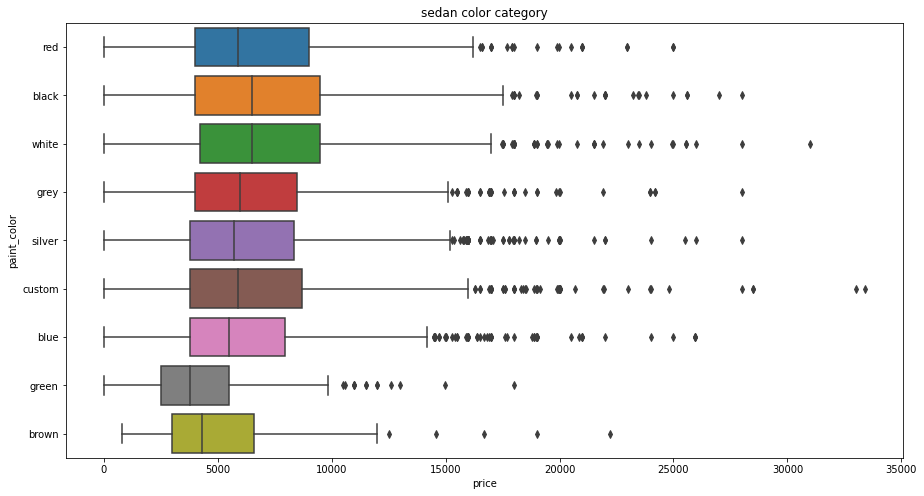

In [61]:
# harga sesuai warna kendaraan (sedan)

plt.figure(figsize=(15,8))
sns.boxplot(data=new_sedan_colors, x='price', y='paint_color');
plt.title('sedan color category')

Kesimpulan sementara
setelah dianalisa faktor yang paling mempengaruhi harga mobil populer jika dilihat dari beberapa parameter:

Jenis Sedan, Parameter:
* Usia: mobil dengan usia yang lama, harga jualnya rendah.
* Jarak: mobil dengan jarak tempuh tinggi semakin berkurang harga jualnya.
* Kondisi: mobil dengan kondisi good, excellent dan like new memiliki harga yang lebih tinggi dibanding mobil kondisi yang lain.
* Transmissi: untuk mobil jenis sedan dengan tansmissi automatic masih menjadi favorit dengan harga yang paling tinggi.
* Warna: warna sedan yang memiliki harga tinggi dan populer adalah warna hitam dan putih.

## Kesimpulan Umum
Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.

Setelah melakukan analisa faktor apa saja yang mempengaruhi harga sebuah mobil, terdapat beberapa kesimpulan:

Tahap analisa awal terdapat missing values pada beberapa kolom seperti, model_year, cylinders, odometer, paint_color, is_4wd selanjutnya dilakukan perbaikan data yang hilang tersebut sesuai dengan nilai yang ada pada masing-masing kolom.
Selain itu terdapat kolom dengain tipe data yang tidak sesuai pada kolom: model_year, is_4wd, date_posted, sehingga perlu tipe data tersebut perlu disesuaikan. Dan terdapat juga nilai yang aneh pada kolom: price price dimana harga mobil yang tidak masuk akal seharga 1 dan perlu analisa lebih lanjut. 

Selanjutnya mengecek outlier pada beberapa kolom yang akan dijadikan parameter seperti Harga, Usia kendaraan ketika iklan ditayangkan, Jarak tempuh, Jumlah silinder, dan Kondisi untuk mengetahui bagaimana outlier mempengaruhi bentuk dan kemudahan dalam pembacaan grafiknya. Dan hasil pengecekan variabel price, age_cars, avg_odometer menggunakan fungsi boxplot dan histogram banyak terdapat outlier. 

Selain itu untuk pengecekan variabel cylinders dan condition menggunakan fungsi countplot tidak terdapat outlier. lalu hasil outlier tersebut dilakukan perbaikan dan diidentifikasi dengan menentukan batas atas atau bawah untuk rentang nilai normal dari dataframenya dan hasilnya grafik menjadi lebih mudah dibaca dibandingkan sebelumnya tanpa outlier.

Terkait masa berlaku iklan, rata-rata hitungan iklan yang ditayangkan berdasarkan kolom days_listed adalah 39 hari dan mediannya selama 33 hari. durasi lama penayangan iklan yang paling cepat adalah tidak sampai dalam hitungan hari (0 hari), dan durasi tayang iklan terlama selama 271 hari. Setelah dianalisa terdapat 2 jenis mobil yang jumlah iklannya terbanyak yaitu jenis SUV dan Sedan, terlihat bahwa harga rata-rata dari kedua jenis mobil tersebut cukup bersaing dibanding jenis lainnya, selain karena jenis mobil tersebut populer dan banyak disukai, sehingga banyak yang mengiklankannya.

Terakhir faktor yang paling mempengaruhi harga mobil populer jika dilihat dari beberapa parameter sesuai dengan 2 mobil yang jumlah iklannya terbanyak yaitu 
1.	Jenis SUV, dengan parameter:
* Usia: semakin lama tahun mobil semakin rendah harga jual mobilnya.
* Jarak tempuh: semakin besar angkanya maka semakin berkurang juga harga jualnya, karena menyangkut kondisi mesin yang terus-terusan beroperasi.
* Kondisi: mobil dengan kondisi excellent dan like new memiliki harga yang lebih tinggi dibanding dengan kondisi yang new.
* Transmissi: untuk mobil jenis SUV dengan tansmissi manual masih menjadi favorit dengan harga yang paling tinggi.
* Warna: warna SUV yang memiliki harga tinggi dan populer adalah warna hitam, putih, dan abu-abu.
2.	Jenis Sedan, dengan parameter:
* Usia: mobil dengan usia yang lama, harga jualnya rendah.
* Jarak: mobil dengan jarak tempuh tinggi semakin berkurang harga jualnya.
* Kondisi: mobil dengan kondisi good, excellent dan like new memiliki harga yang lebih tinggi dibanding mobil kondisi yang lain.
* Transmissi: untuk mobil jenis sedan dengan tansmissi automatic masih menjadi favorit dengan harga yang paling tinggi.
* Warna: warna sedan yang memiliki harga tinggi dan populer adalah warna hitam dan putih.


In [62]:
print("Thank you for evaluating my project, Looking forward to your feedback")

Thank you for evaluating my project, Looking forward to your feedback
